- Regridder <br>
https://pangeo-xesmf.readthedocs.io/en/stable/user_api.html
xesmf.frontend.Regridder(ds_in, ds_out, method, ...
    - ds_in, ds_out: Dataset, DataArray, dictionary
    - Contain input and output grid coordinates （lat,lon）
    - method： strOptions are
      - ‘bilinear’
      - ‘conservative’, need grid corner information
      - ‘conservative_normed’, need grid corner information
      - ‘patch’
      - ‘nearest_s2d’
      - ‘nearest_d2s’

 -  Save time by reusing regridder
https://xesmf.readthedocs.io/en/latest/notebooks/Reuse_regridder.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
def plot_2d(lat, lon, data_2d, color_map, title_s):
    fig = plt.figure(figsize=(10,14))

    # Set the axes using the specified map projection
    ax=plt.axes(projection=ccrs.PlateCarree())
    
    # Make a filled contour plot
    filled_c = ax.contourf(lon, lat, data_2d,
                           levels =np.arange(294, 302, 1), extend='both',
                           cmap = color_map, transform = ccrs.PlateCarree())

    # Add coastlines
    ax.coastlines()
    ax.add_feature(cfeature.STATES, zorder=1, linewidth=.3, edgecolor='black')
    ax.set_title(title_s)
    
    ax = plt.gca()
    ax.gridlines(draw_labels=True)   
    # or..
    #ax.set_xticks([-40, -20, 0, 20, 40], crs=ccrs.PlateCarree())

    # Add a colorbar for the filled contour.
    # and pad argument to set colorbar away from x-axis
    fig.colorbar(filled_c,  label= 'm/s', pad = 0.05, fraction=0.04, orientation="horizontal"); # 

#### read in input file

In [4]:
flnm_i = '/glade/campaign/mmm/c3we/prein/CMIP5_PGW/CCSM4/ts_Amon_CCSM4_historical_r1i1p1_monthly_climatology.nc'
with xr.open_dataset(flnm_i) as ds_i:
    print(flnm_i)

/glade/campaign/mmm/c3we/prein/CMIP5_PGW/CCSM4/ts_Amon_CCSM4_historical_r1i1p1_monthly_climatology.nc


In [5]:
#rename the coordinate names to lon and lat 
#ds_wrf = ds_wrf.rename({"west_east": "lon", "south_north": "lat"}) 

#### # define output grid coordinates

In [6]:
flnm_wrf = '/glade/derecho/scratch/mingge/wpsv4.5/ds_out.nc'
print('---output WRF grid ----')
with xr.open_dataset(flnm_wrf) as ds_wrf:
    print(flnm_wrf)

ds_o = xr.Dataset(
    coords=dict(
        lat=(["south_north", "west_east"], ds_wrf.XLAT_M[0].values),
        lon=(["south_north", "west_east"], ds_wrf.XLONG_M[0].values)
    )
)

---output WRF grid ----
/glade/derecho/scratch/mingge/wpsv4.5/ds_out.nc


#### Build Regridder

In [7]:
%%time
regridder_wrf = xe.Regridder(ds_i, ds_o, 'bilinear')

CPU times: user 1.31 s, sys: 78.9 ms, total: 1.39 s
Wall time: 1.45 s


#### Apply regridding

In [8]:
%time
ts_wrf = regridder_wrf(ds_i['ts'])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


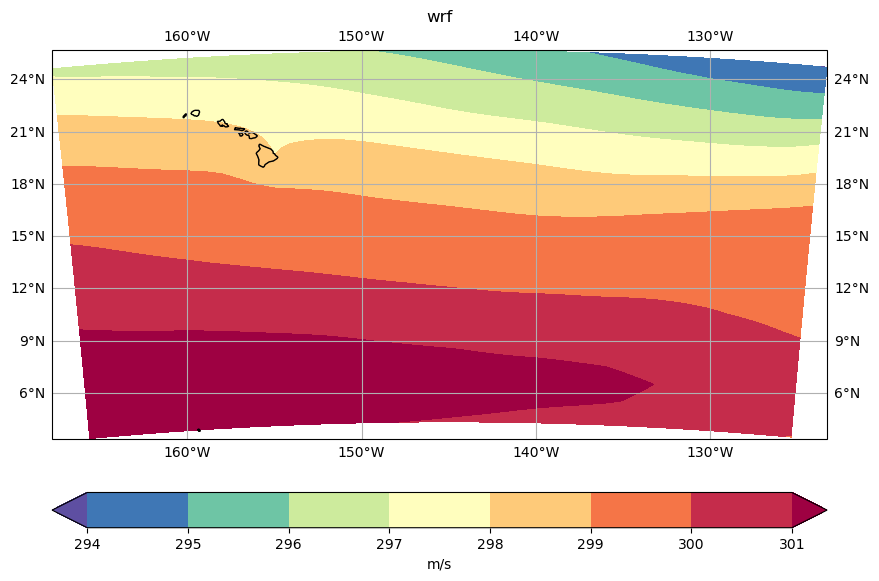

In [9]:
plot_2d(ts_wrf.lat, ts_wrf.lon, ts_wrf[0], 'Spectral_r', 'wrf')

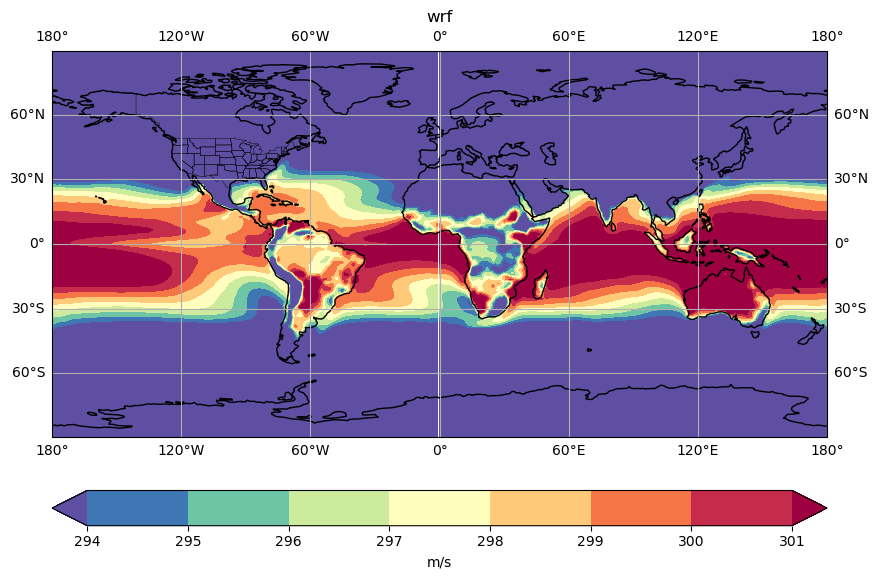

In [11]:
plot_2d(ds_i.lat, ds_i.lon, ds_i['ts'][0], 'Spectral_r', 'wrf')